### A spatio-temporal dataset of weekly chickenpox (childhood disease) cases from Hungary. 

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
)
from tensorflow.keras.layers import (
    Dense,
    LSTM,
    Dropout, Bidirectional,
)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model

 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
import matplotlib.gridspec as gridspec

import datetime
from datetime import date
from pandas_datareader import data as pdr

In [15]:
def create_dataset2(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

look_back=3
trainX=[]
testX=[]
y_train=[]

In [16]:
df=pd.read_csv('hungary_chickenpox.csv' )
df.set_index(['Date'], inplace=True)
df.head()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
Date,,,,,,,,,,,,,,,,,,,,
03/01/2005,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
10/01/2005,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
17/01/2005,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
24/01/2005,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
31/01/2005,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60


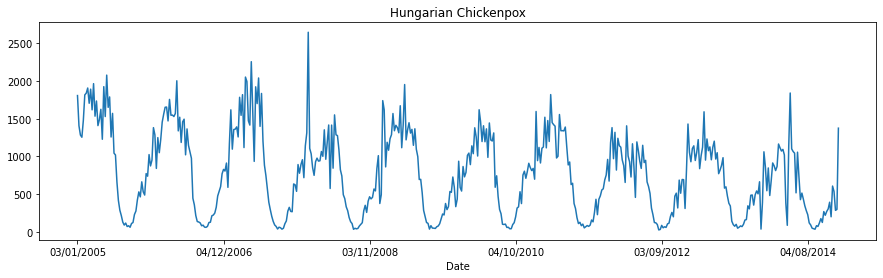

In [17]:
df['Cnt'] = df.sum(axis=1)
#print(df)
plt.figure(figsize=(15,4))
df['Cnt'].plot()
plt.title('Hungarian Chickenpox')
plt.show()

In [18]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
f_columns = ['Cnt']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

C:\Users\avish\AppData\Local\Temp\ipykernel_24572\3186171719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(
C:\Users\avish\AppData\Local\Temp\ipykernel_24572\3186171719.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, f_columns] = f_transformer.transform(


In [19]:
X_train, y_train = create_dataset2(train, train.Cnt, look_back)
X_test, y_test = create_dataset2(test, test.Cnt, look_back)

In [42]:
n_future = 1
#timeSteps=3

model = Sequential()

model.add(Bidirectional(LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))


model.add(LSTM(units= 128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 128))
model.add(Dropout(0.2))
model.add(Dense(units = n_future))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])



plot_model(model, to_file="plot\\model.png")
#img=plt.imread('/plot/model.png')
#plt.imshow(img)
plt.show()

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [43]:
print(X_train.shape[1], X_train.shape[2])
print(len(X_train),len(X_test))
#print(X_train)

3 21
362 154


In [47]:
history=model.fit(X_train, y_train,epochs=20,batch_size=32,
    validation_split=0.1,
    shuffle=False  )

Epoch 1/20
11/11 [==============================] - 0s 14ms/step - loss: 0.0019 - acc: 0.0062 - val_loss: 0.1027 - val_acc: 0.0000e+00
Epoch 2/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0022 - acc: 0.0062 - val_loss: 0.1035 - val_acc: 0.0000e+00
Epoch 3/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0021 - acc: 0.0062 - val_loss: 0.0965 - val_acc: 0.0000e+00
Epoch 4/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0023 - acc: 0.0062 - val_loss: 0.1134 - val_acc: 0.0000e+00
Epoch 5/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0026 - acc: 0.0062 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 6/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0024 - acc: 0.0062 - val_loss: 0.0875 - val_acc: 0.0000e+00
Epoch 7/20
11/11 [==============================] - 0s 11ms/step - loss: 0.0032 - acc: 0.0062 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 8/20
11/11 [==============================] - 0s 

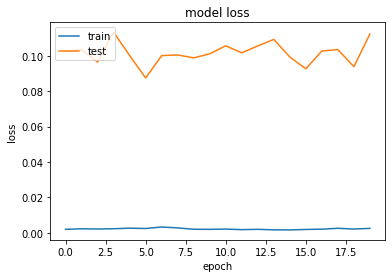

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

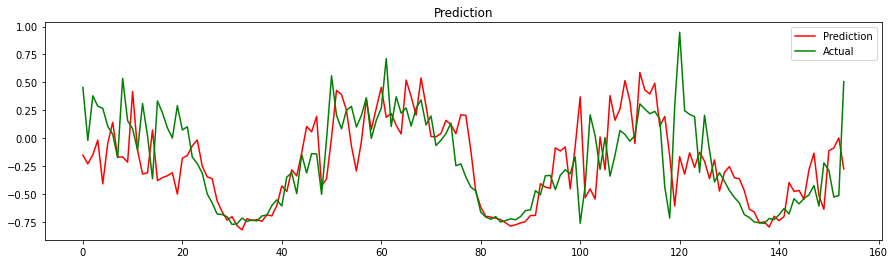

In [49]:
#print(X_test)

y_prediction = model.predict(X_test)
plt.figure(figsize=(15, 4))
plt.plot(y_prediction, label="Prediction", color='r')
plt.plot(y_test, label="Actual", color='g')
plt.title("Prediction")
plt.legend()
plt.show()